In [1]:
'''
Mount Google Drive to read images
Import OpenCV and other utils
Load a customized method to show images
'''
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Utility method to show images
def show_images(images, titles, cols=1,plot=None):
    n_images = len(images)
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if plot:
          plt.plot(image)
        else:
          plt.imshow(image,cmap='gray',vmin=0,vmax=255)
        a.set_title(title)
    if plot:
      fig.set_size_inches(np.array((6,2)) * n_images)
    else:
      fig.set_size_inches(np.array((5,5)) * n_images)
    plt.show()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Read grayscale image
img = cv2.imread('/content/gdrive/My Drive/lena512.bmp',0)

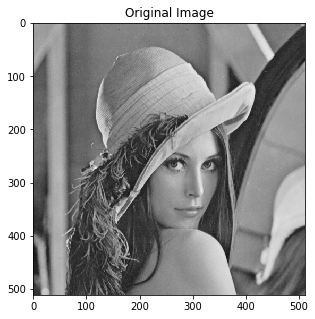

In [4]:
#Show image
show_images([img],titles=['Original Image'])

In [3]:
#Check image dimensions
print("Shape:",img.shape)
#Check image bit depth (uint8 means 8 bit depth)
print("Bit depth:",img.dtype)

Shape: (512, 512)
Bit depth: uint8


In [0]:
#Create a list and store every pixels value by converting to binary
#The binary_repr method converts pixel value to 8 bit binary value
values = []
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    values.append(np.binary_repr(img[i][j], width=8))

In [6]:
#Check first 5 values
print(values[:5])
#Total values should be 512*512 = 262144
print(len(values))

['10100010', '10100010', '10100010', '10100001', '10100010']
262144


In [0]:
#Create a list of 8 arrays for holding one bit depth image from 1 to 8
images = []
#For converting binary to decimal
multiply_bit = 128
for i in range(8):
  bit_img = (np.array([int(num[i]) for num in values],
                      dtype=np.uint8)*multiply_bit)
  # print(bit_img[:200])
  #Reshape image to original dimension                   
  bit_img = bit_img.reshape(img.shape[0],img.shape[1])
  images.append(bit_img)
  multiply_bit/=2

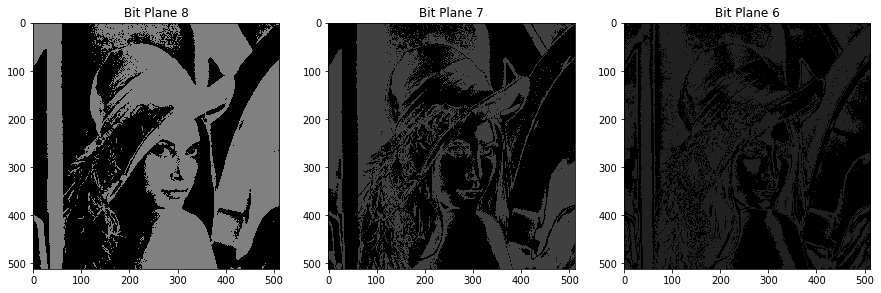

In [8]:
#Show the bit plane images
show_images(images[:3],titles=['Bit Plane 8','Bit Plane 7','Bit Plane 6'])

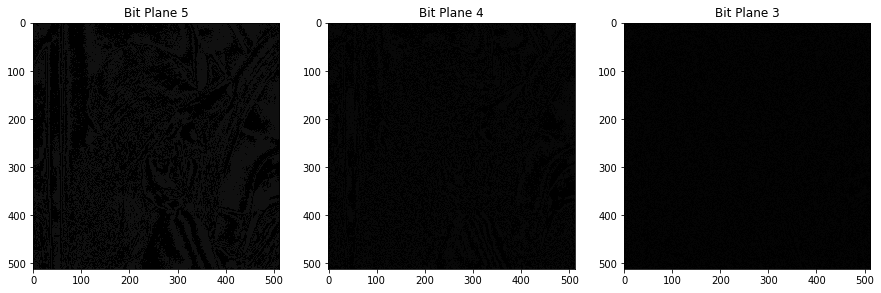

In [9]:
show_images(images[3:6],titles=['Bit Plane 5','Bit Plane 4','Bit Plane 3'])

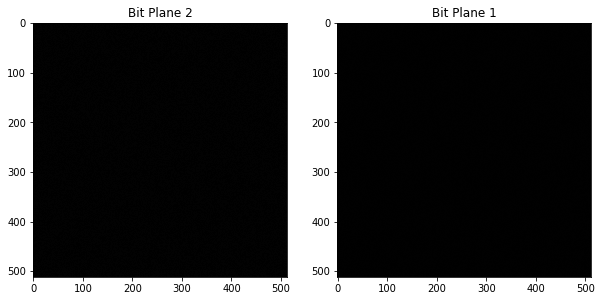

In [10]:
show_images(images[6:8],titles=['Bit Plane 2','Bit Plane 1'])

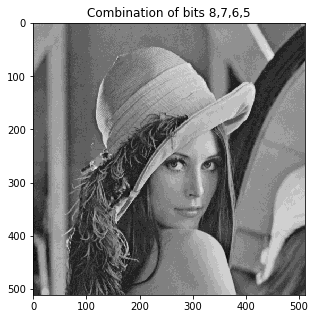

In [13]:
#Combination of last 4 bit planes
comb = [images[0]+images[1]+images[2]+images[3]]
show_images(comb, titles=['Combination of bits 8,7,6,5'])